In [7]:
import numpy as np
import mod
from tqdm import tqdm
import bc_gh
from matplotlib import  pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [8]:
def getAdjustedConste(r, PHI):

    m = PHI.shape[0]
    M1 = 2**(m+2)
    M2 = r.size

    M = M1*M2

    _, labels = mod.grayAPSK(np.array([M1]*M2))

    delta_theta = 2*np.pi/M1
    theta0 = 0.5*delta_theta

    thetas = np.arange(theta0, 2*np.pi, delta_theta)
    thetas = thetas.reshape((len(thetas), 1))

    tmp1 = np.array([range(M1)])+1
    tmp2 = np.array([range(m)])+1

    phase_shifts = (-1)**(np.ceil(tmp1.T/2**(tmp2-1))+1)@PHI

    THETAS = thetas+phase_shifts
    
    symbols = np.exp(1j*THETAS)*r
    symbols = np.reshape(symbols, (M, 1))

    symbols = mod.normalizeConste(symbols)

    return symbols, labels

In [9]:
r = np.array([0.1381, 0.2687, 0.3749, 0.4673, 0.5741, 0.6757, 0.8136, 1])
PHI = np.pi*np.array([
    [0.0312, 0.0289, 0.0215, 0.0131, 0.0040, 0.0005, 0, 0], 
    [0.0454, 0.0096, 0.0008, 0, 0, 0, 0, 0], 
    [0.011, 0, 0, 0, 0, 0, 0, 0]
])

symbols2_3, labels2_3 = getAdjustedConste(r, PHI)
symbols1_3, labels1_3 = getAdjustedConste(r, PHI)
symbols1_2, labels1_2 = getAdjustedConste(r, PHI)

In [10]:
symbols2, labels2 = mod.grayAPSK(np.array([32]*8))
symbols3, labels3 = mod.grayQAM(256)

In [11]:
SNR_dB = np.arange(0, 30, 1)
SNR_lin = 10**(.1*SNR_dB)

bc2_3 = np.zeros((SNR_lin.size, 8))
bc1_3 = np.zeros((SNR_lin.size, 8))
bc1_2 = np.zeros((SNR_lin.size, 8))
bc2 = np.zeros((SNR_lin.size, 8))
bc3 = np.zeros((SNR_lin.size, 8))

for i in tqdm(range(SNR_lin.size)):
    bc2_3[i, :] = bc_gh.awgn(symbols2_3*np.sqrt(SNR_lin[i]), labels2_3)
    bc1_3[i, :] = bc_gh.awgn(symbols1_3*np.sqrt(SNR_lin[i]), labels1_3)
    bc1_2[i, :] = bc_gh.awgn(symbols2_3*np.sqrt(SNR_lin[i]), labels1_2)
    bc2[i, :] = bc_gh.awgn(symbols2*np.sqrt(SNR_lin[i]), labels2)
    bc3[i, :] = bc_gh.awgn(symbols3*np.sqrt(SNR_lin[i]), labels3)

100%|██████████| 30/30 [00:08<00:00,  3.74it/s]


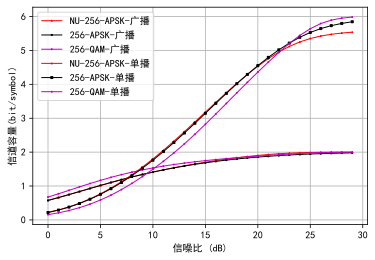

In [16]:
# fig = plt.figure()
# plt.grid()

# #解决中文显示问题
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus'] = False 

# plt.plot(SNR_dB, bc1[:, 0:2].sum(axis=1), linewidth=1.0, marker='^', markersize=1, color='r')
# plt.plot(SNR_dB, bc2[:, 0:2].sum(axis=1), linewidth=1.0, marker='s', markersize=1, color='k')
# plt.plot(SNR_dB, bc3[:, 0:2].sum(axis=1), linewidth=1.0, marker='.', markersize=2, color='m')

# plt.plot(SNR_dB, bc1[:, 2:].sum(axis=1), linewidth=1.0, marker='^', markersize=1, color='r')
# plt.plot(SNR_dB, bc2[:, 2:].sum(axis=1), linewidth=1.0, marker='s', markersize=2, color='k')
# plt.plot(SNR_dB, bc3[:, 2:].sum(axis=1), linewidth=1.0, marker='.', markersize=2, color='m')

# plt.xlabel("信噪比 (dB)")
# plt.ylabel("信道容量(bit/symbol)")

# plt.legend(["NU-256-APSK-广播", "256-APSK-广播", "256-QAM-广播", "NU-256-APSK-单播", "256-APSK-单播", "256-QAM-单播"])

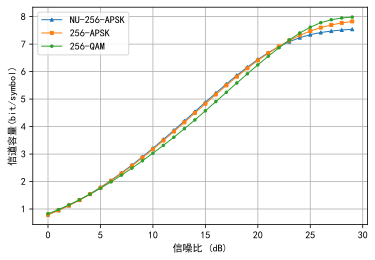

In [23]:
fig = plt.figure()
plt.grid()

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

plt.plot(SNR_dB, bc2_3.sum(axis=1), linewidth=1.0, marker='^', markersize=3)
plt.plot(SNR_dB, bc1_3.sum(axis=1), linewidth=1.0, marker='^', markersize=3)
plt.plot(SNR_dB, bc1_2.sum(axis=1), linewidth=1.0, marker='^', markersize=3)
plt.plot(SNR_dB, bc2.sum(axis=1), linewidth=1.0, marker='s', markersize=3)
plt.plot(SNR_dB, bc3.sum(axis=1), linewidth=1.0, marker='.', markersize=5)

plt.xlabel("信噪比 (dB)")
plt.ylabel("信道容量(bit/symbol)")
# plt.xlim([16.25, 17])
# plt.ylim([5.32, 5.34])
plt.legend(["NU-256-APSK-2/3", "NU-256-APSK-1/3", "NU-256-APSK-1/2", "256-APSK", "256-QAM"])